In [ ]:
import os
!pip install kaggle
!pwd

!kaggle competitions download -c tlvmc-parkinsons-freezing-gait-prediction

# Unzip the downloaded dataset
!unzip tlvmc-parkinsons-freezing-gait-prediction.zip

# Now the dataset files should be in your current directory

In [ ]:
defog_example = pd.read_csv('/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv')
defog_example

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.002697,0.022371,0.068304,0,0,0,False,False
1,1,-1.002641,0.019173,0.066162,0,0,0,False,False
2,2,-0.999820,0.019142,0.067536,0,0,0,False,False
3,3,-0.998023,0.018378,0.068409,0,0,0,False,False
4,4,-0.998359,0.016726,0.066448,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
118865,118865,-1.001893,0.053704,-0.006347,0,0,0,False,False
118866,118866,-1.005036,0.051916,-0.008076,0,0,0,False,False
118867,118867,-1.005337,0.052860,-0.009193,0,0,0,False,False
118868,118868,-1.003345,0.057860,-0.007546,0,0,0,False,False


In [ ]:
# get a summary of the data
print(defog_example.describe())

# check for missing values
print(defog_example.isnull().sum())

# check the data types of columns
print(defog_example.dtypes)

# check the correlation between variables
print(defog_example.corr())

                Time           AccV          AccML          AccAP  \
count  118870.000000  118870.000000  118870.000000  118870.000000   
mean    59434.500000      -0.956294       0.014926       0.146846   
std     34314.957587       0.123618       0.079237       0.244915   
min         0.000000      -3.406332      -0.799892      -0.960941   
25%     29717.250000      -0.995688      -0.012962       0.009221   
50%     59434.500000      -0.984641       0.014863       0.141871   
75%     89151.750000      -0.961288       0.042899       0.209394   
max    118869.000000      -0.227743       1.182802       1.034753   

       StartHesitation           Turn        Walking  
count         118870.0  118870.000000  118870.000000  
mean               0.0       0.040044       0.000673  
std                0.0       0.196063       0.025934  
min                0.0       0.000000       0.000000  
25%                0.0       0.000000       0.000000  
50%                0.0       0.000000       0.00

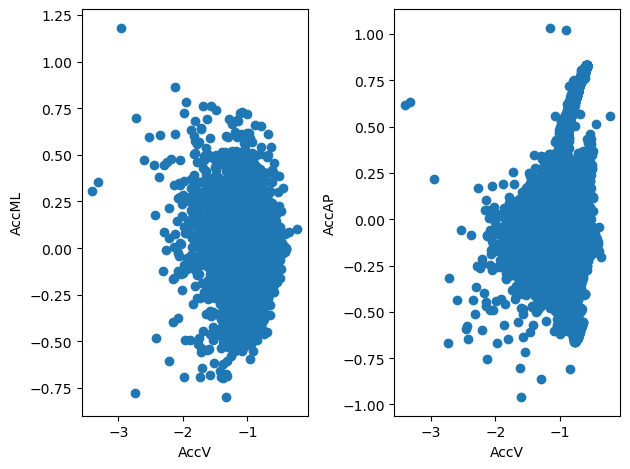

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(defog_example['AccV'], defog_example['AccML'])
plt.xlabel('AccV')
plt.ylabel('AccML')

# create a scatter plot of AccV and AccAP
plt.subplot(1, 2, 2)
plt.scatter(defog_example['AccV'], defog_example['AccAP'])
plt.xlabel('AccV')
plt.ylabel('AccAP')

# Adjust the layout of the subplots
plt.tight_layout()

# display the subplots
plt.show()

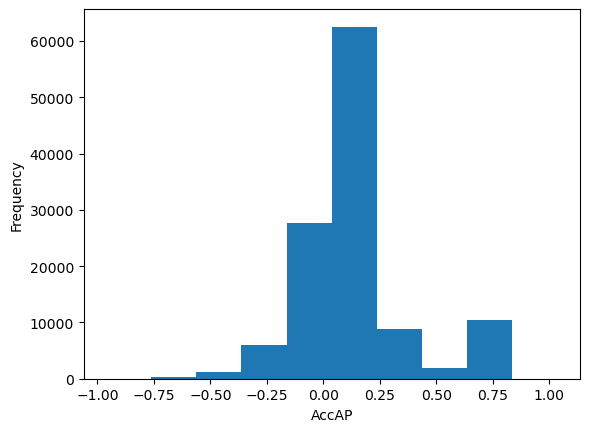

In [ ]:
# create a histogram of AccAP
plt.hist(defog_example['AccAP'])
plt.xlabel('AccAP')
plt.ylabel('Frequency')
plt.show()

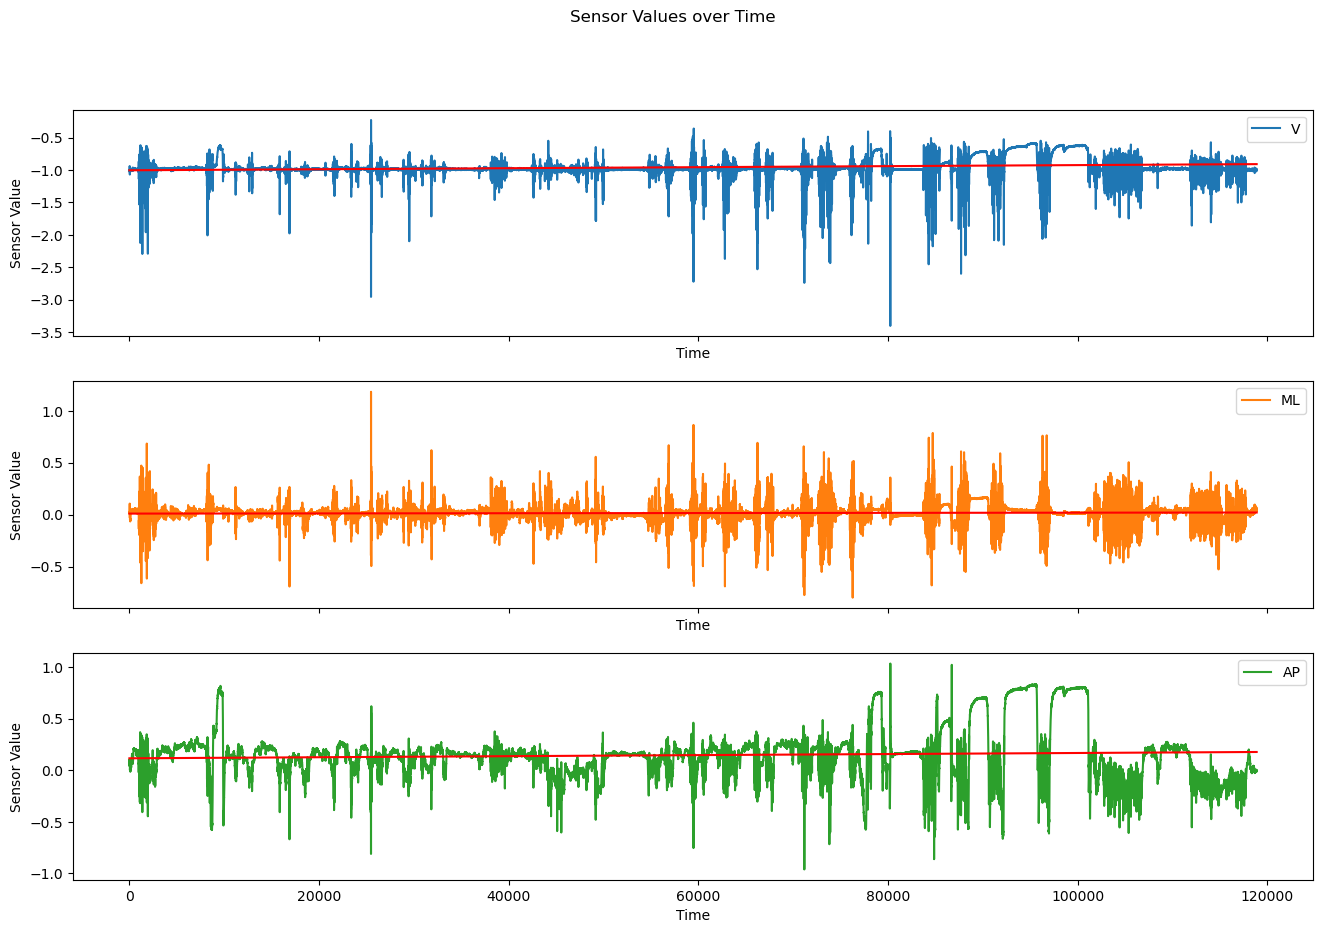

In [ ]:
fig, axes = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(16,10))
fig.suptitle('Sensor Values over Time')

data = {'V': defog_example.AccV, 'ML': defog_example.AccML, 'AP': defog_example.AccAP}

for i, (name, values) in enumerate(data.items()):
    ax = axes[i]
    ax.plot(values, label=name, color=f'C{i}')
    a, b = np.polyfit(values.index, values, 1)
    ax.plot(values.index, a*values.index+b, color='red')
    ax.set_xlabel('Time')
    ax.set_ylabel('Sensor Value')
    ax.legend()

plt.show()

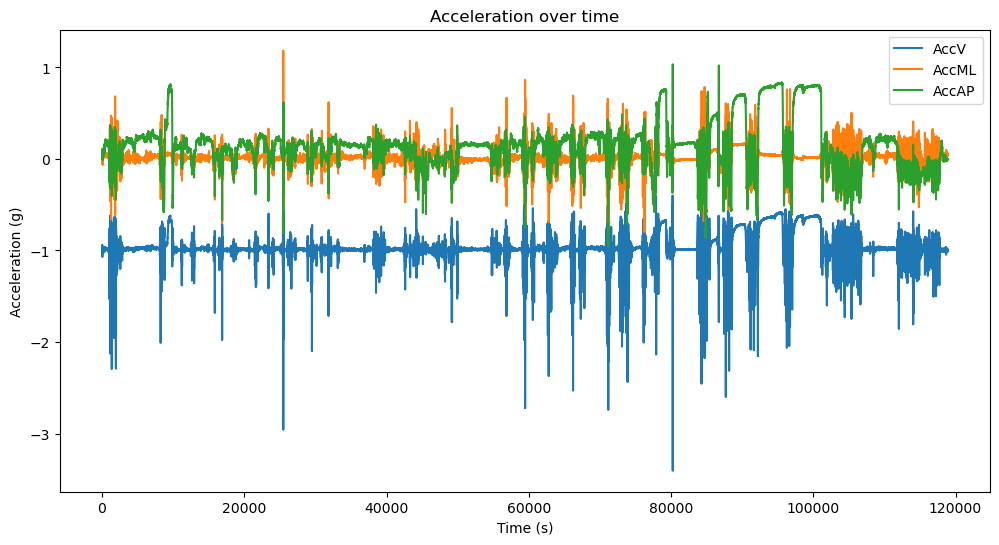

In [ ]:
# Plot acceleration on each axis over time
fig, ax = plt.subplots(figsize=(12,6))
defog_example.plot(x='Time', y=['AccV', 'AccML', 'AccAP'], ax=ax);
ax.set_xlabel('Time (s)');
ax.set_ylabel('Acceleration (g)');
ax.set_title('Acceleration over time');

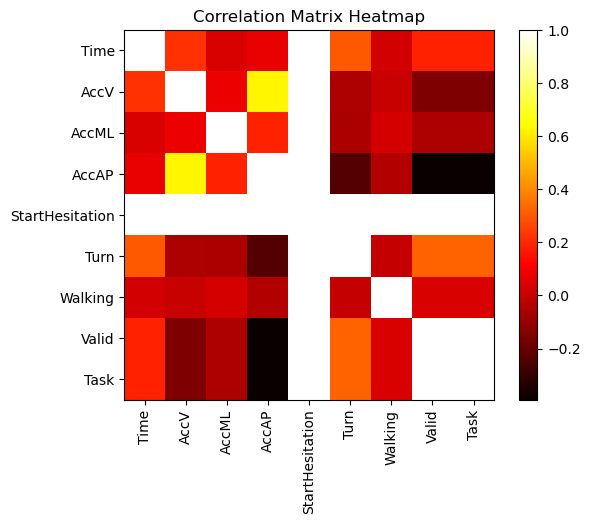

In [ ]:
# create a heatmap of the correlation matrix
corr_matrix = defog_example.corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


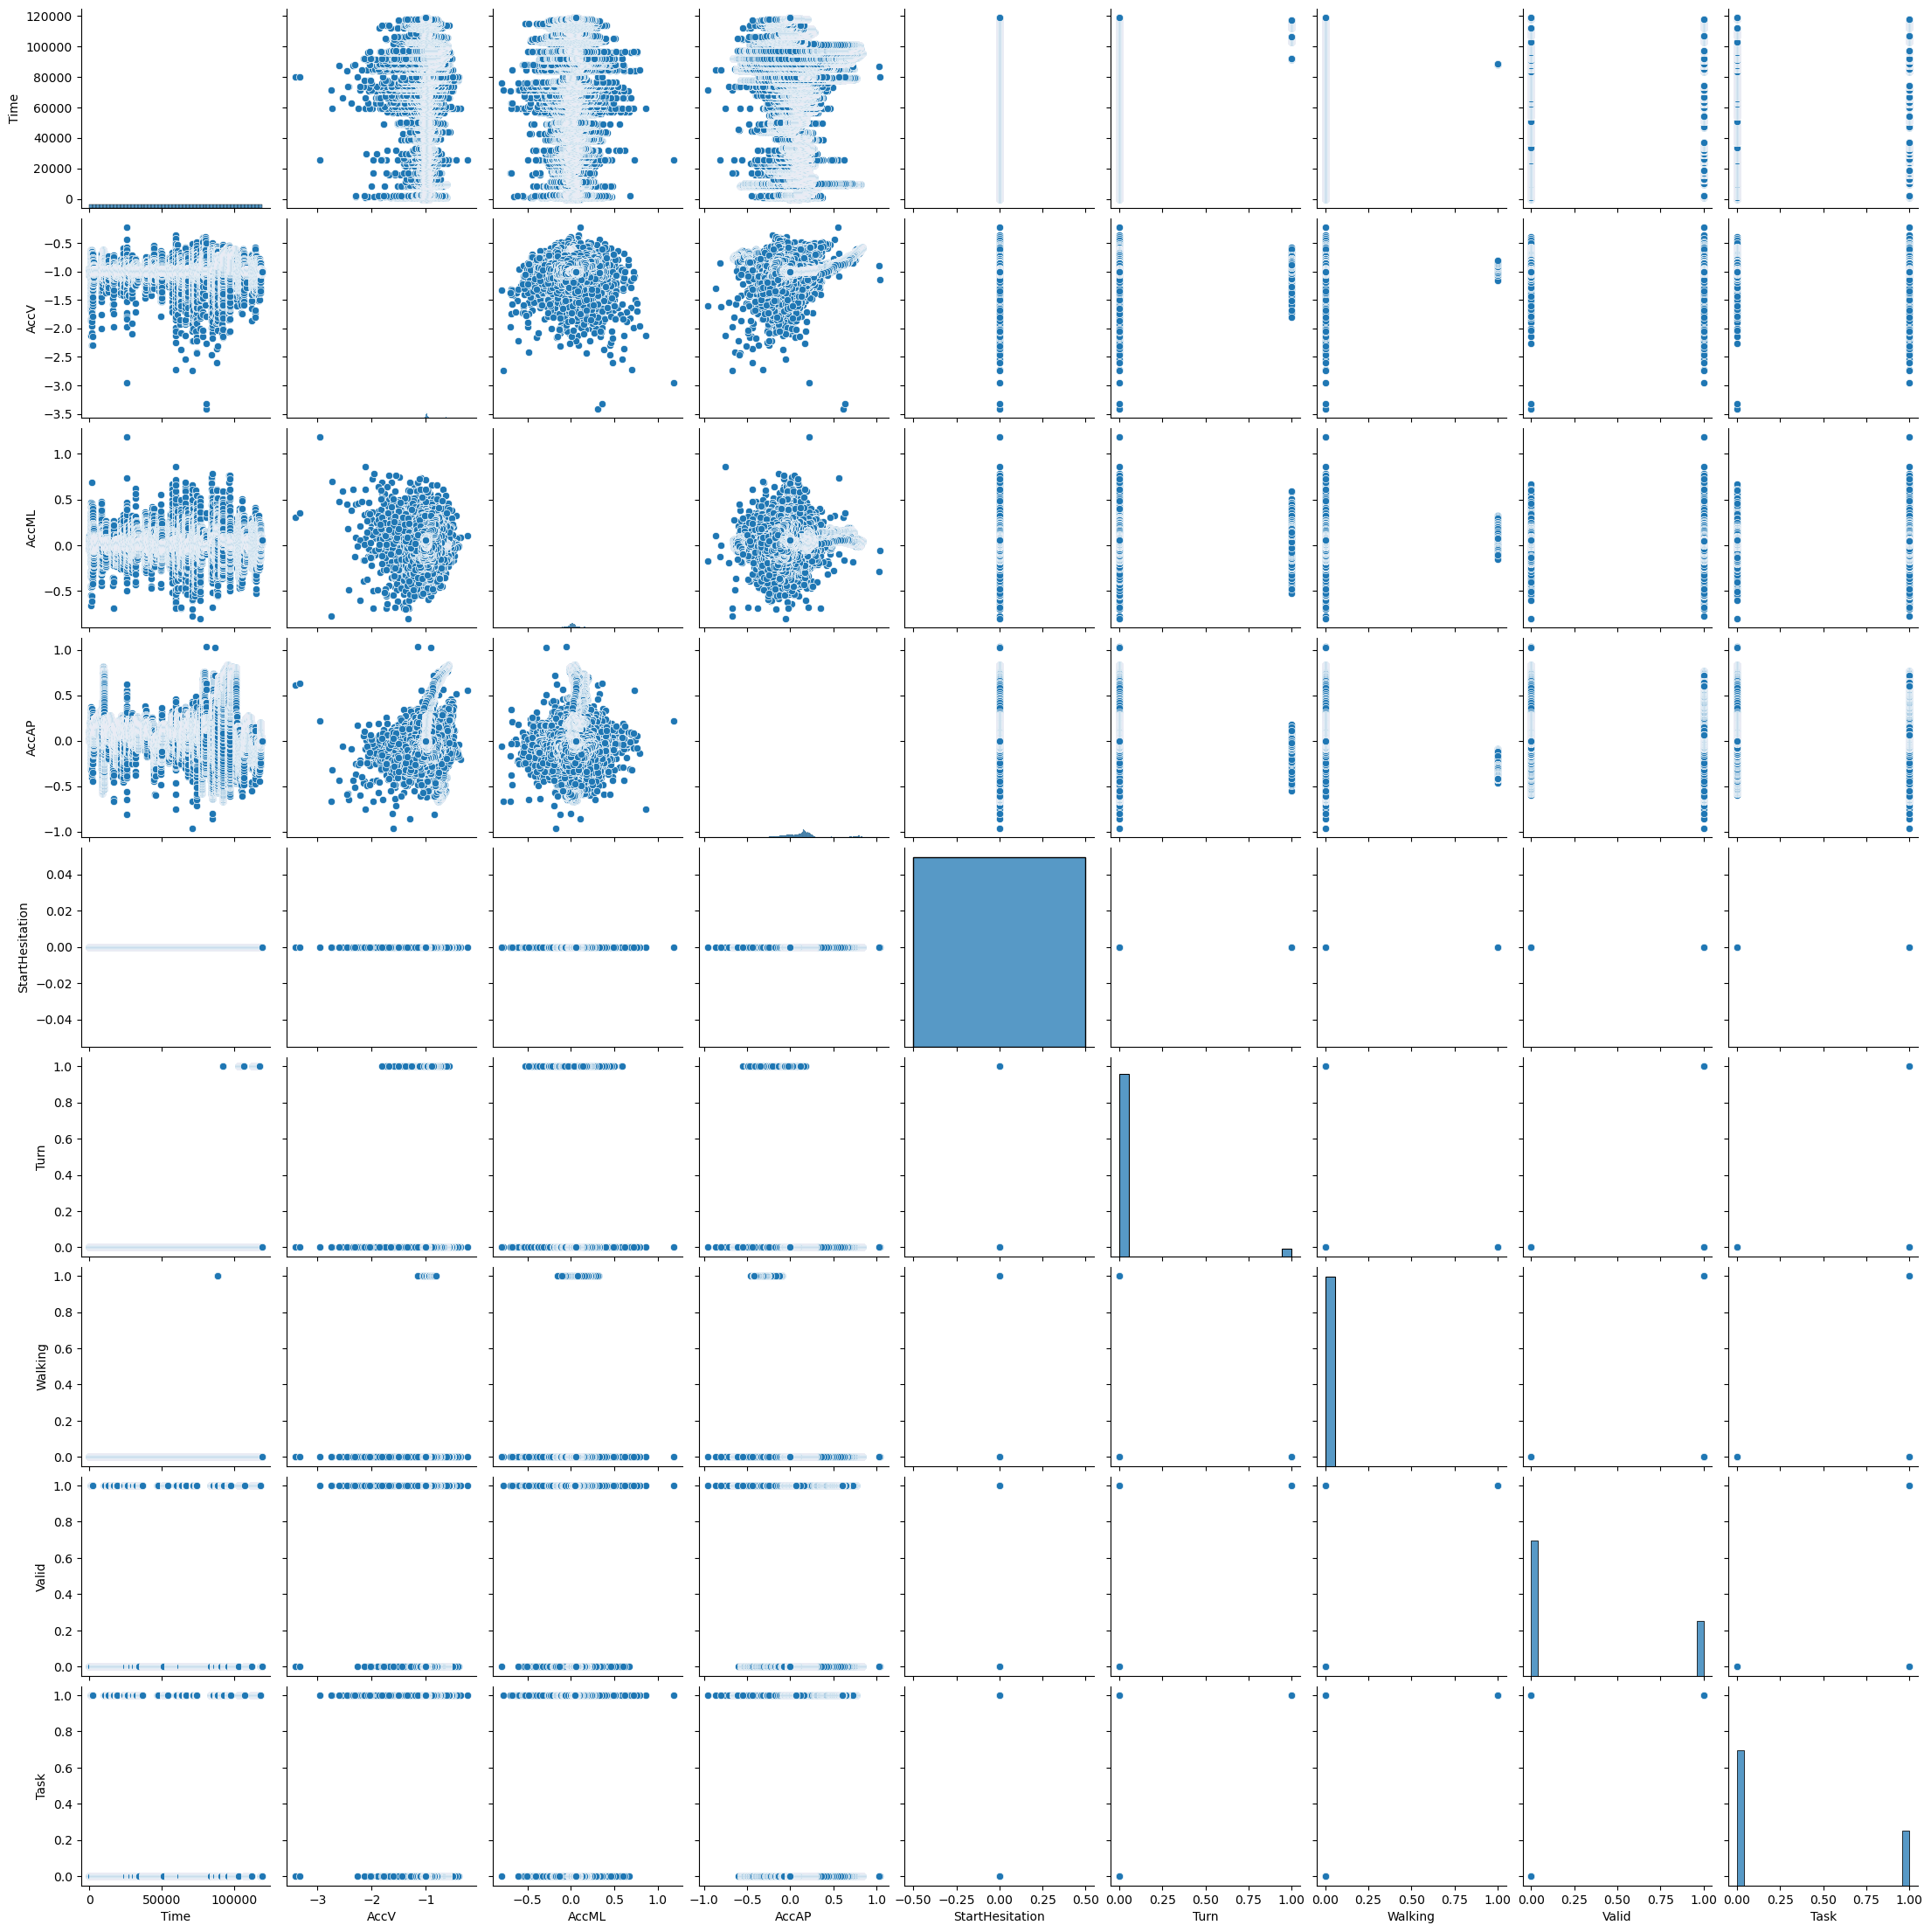

In [ ]:
# create a scatter plot matrix using Seaborn
sns.pairplot(defog_example)
plt.show();

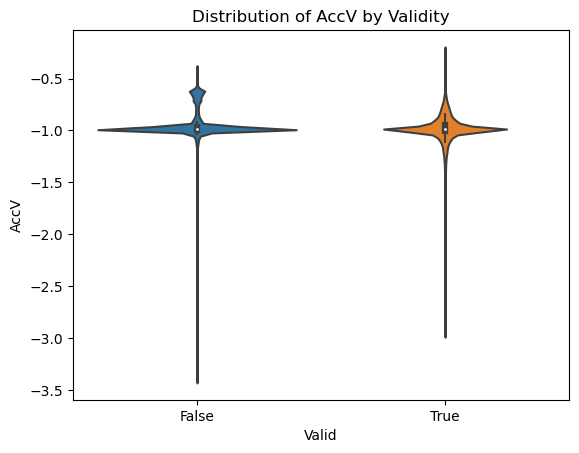

In [ ]:
# create a violin plot of acceleration on the vertical axis (AccV)
sns.violinplot(x='Valid', y='AccV', data=defog_example)

# add title to the plot
plt.title('Distribution of AccV by Validity')

plt.show()

In [ ]:
tdcsfog_meta = pd.read_csv('/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv')
tdcsfog_meta

,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on
...,...,...,...,...,...
828,feba449e1a,312788,19,1,on
829,ff4f844fd3,af82b2,2,3,on
830,ff53514514,3b2403,2,3,on
831,ff92d9244d,2d57c2,20,2,on


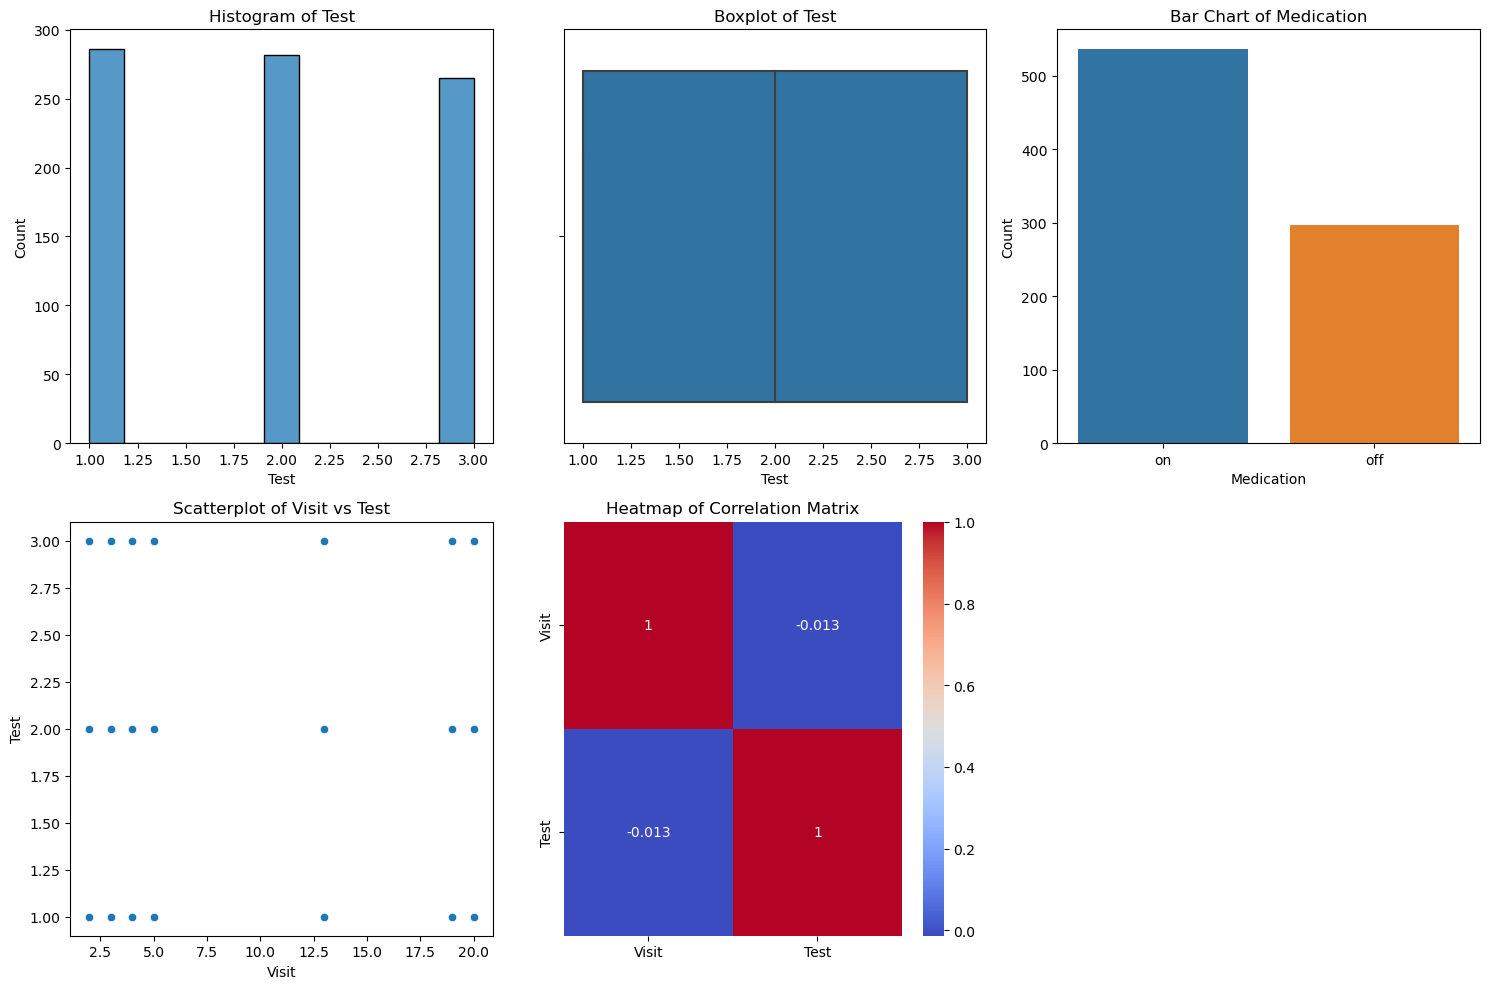

In [ ]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# create histogram of Test column
sns.histplot(x='Test', data=tdcsfog_meta, ax=axes[0, 0])
axes[0, 0].set_xlabel('Test')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Histogram of Test')

# create boxplot of Test column
sns.boxplot(x='Test', data=tdcsfog_meta, ax=axes[0, 1])
axes[0, 1].set_xlabel('Test')
axes[0, 1].set_title('Boxplot of Test')

# create countplot of Medication column
sns.countplot(x='Medication', data=tdcsfog_meta, ax=axes[0, 2])
axes[0, 2].set_xlabel('Medication')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Bar Chart of Medication')

# create scatterplot of Visit vs Test
sns.scatterplot(x='Visit', y='Test', data=tdcsfog_meta, ax=axes[1, 0])
axes[1, 0].set_xlabel('Visit')
axes[1, 0].set_ylabel('Test')
axes[1, 0].set_title('Scatterplot of Visit vs Test')

# create heatmap of correlation between numerical columns
corr = tdcsfog_meta[['Visit', 'Test']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap of Correlation Matrix')

# remove empty subplot
fig.delaxes(ax=axes[1, 2])

# adjust layout and display figure
fig.tight_layout()
plt.show()

In [ ]:
subjects = pd.read_csv('/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv')
subjects

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,00f674,2.0,63,M,27.0,43.0,49.0,24
1,00f674,1.0,63,M,27.0,31.0,30.0,26
2,02bc69,NaN,69,M,4.0,21.0,NaN,22
3,040587,2.0,75,M,26.0,52.0,69.0,21
4,040587,1.0,75,M,26.0,47.0,75.0,24
...,...,...,...,...,...,...,...,...
168,f80507,1.0,57,M,2.0,12.0,NaN,0
169,fa8764,NaN,60,F,7.0,30.0,NaN,19
170,fba3a3,1.0,65,F,8.0,28.0,NaN,0
171,fcb9f5,1.0,69,M,3.5,27.0,49.0,23


In [ ]:
!pip install pywaffle
from pywaffle import Waffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 52.3 MB/s eta 0:00:0000:0100:01


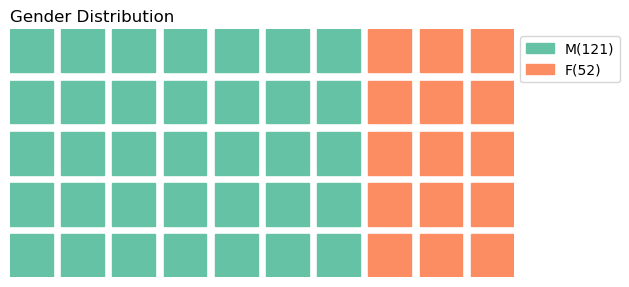

In [ ]:
gender_counts = subjects["Sex"].value_counts()

plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=gender_counts,
    title={'label': 'Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender_counts.index, gender_counts) ],
    # Set the position of the legend
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    dpi=100
)

plt.show()

(173, 8)
Subject          object
Visit           float64
Age               int64
Sex              object
YearsSinceDx    float64
UPDRSIII_On     float64
UPDRSIII_Off    float64
NFOGQ             int64
dtype: object
Subject          0
Visit           62
Age              0
Sex              0
YearsSinceDx     0
UPDRSIII_On      1
UPDRSIII_Off    41
NFOGQ            0
dtype: int64
            Visit         Age  YearsSinceDx  UPDRSIII_On  UPDRSIII_Off  \
count  111.000000  173.000000    173.000000   172.000000    132.000000   
mean     1.369369   67.763006     10.383931    34.273256     42.878788   
std      0.484823    7.972075      6.289191    12.732552     12.998550   
min      1.000000   28.000000      0.420000     5.000000     15.000000   
25%      1.000000   62.000000      6.000000    25.000000     33.000000   
50%      1.000000   68.000000      9.000000    35.000000     43.000000   
75%      2.000000   73.000000     15.000000    42.250000     49.250000   
max      2.000000   94.00000

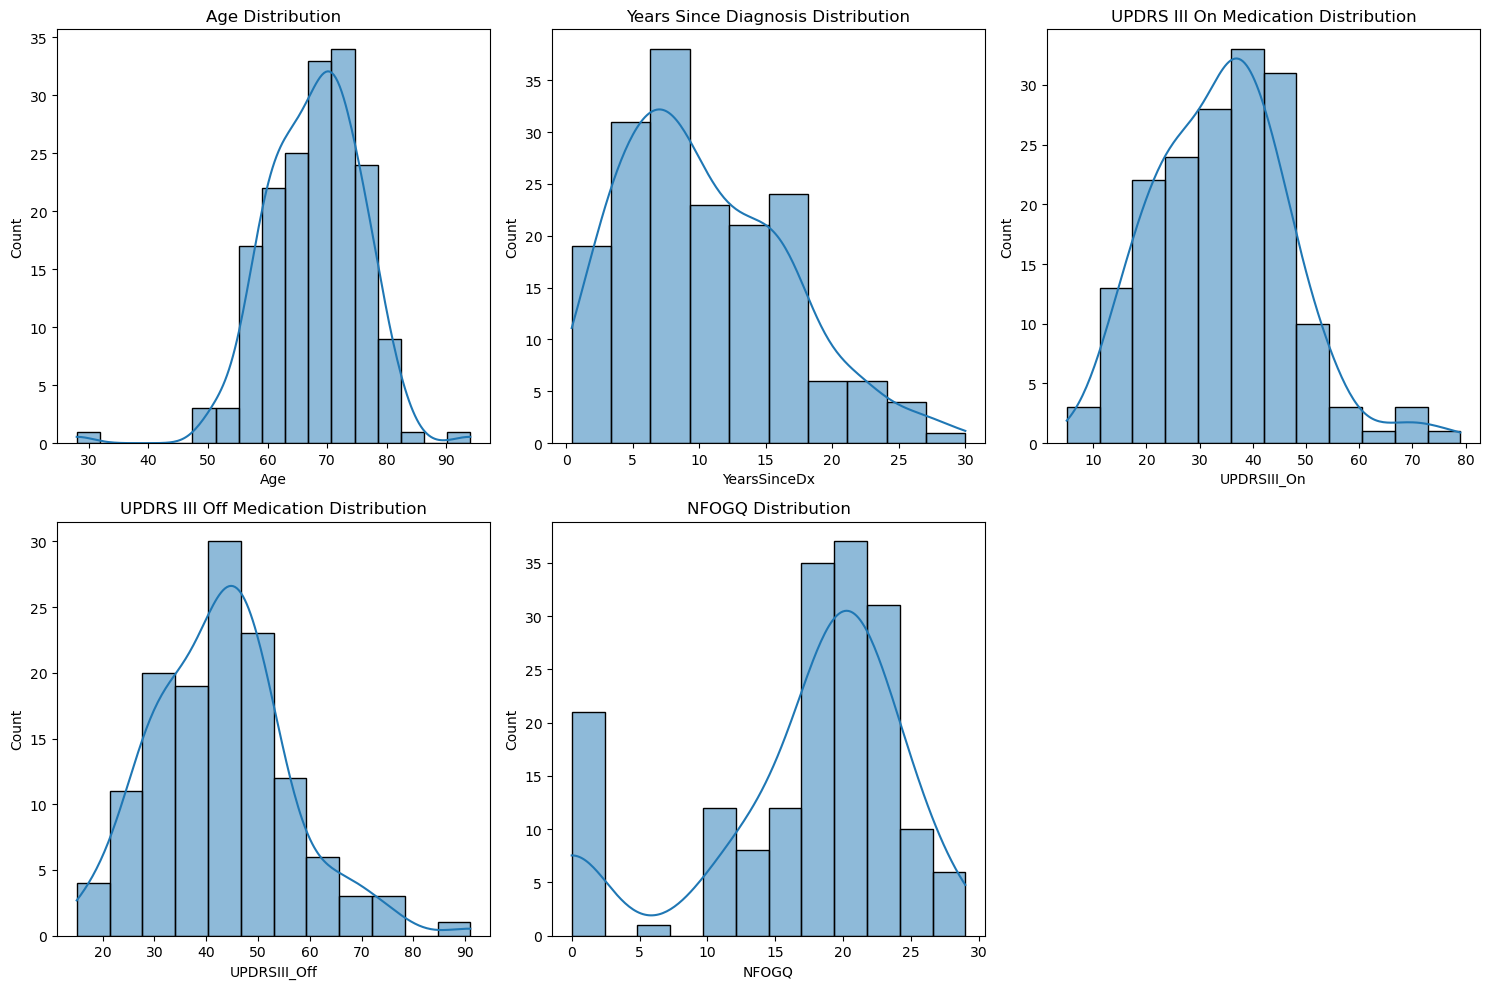

                   Age  YearsSinceDx  UPDRSIII_On  UPDRSIII_Off     NFOGQ
Age           1.000000      0.038371     0.233860      0.121052  0.053236
YearsSinceDx  0.038371      1.000000     0.296986      0.269930  0.282845
UPDRSIII_On   0.233860      0.296986     1.000000      0.645712  0.315943
UPDRSIII_Off  0.121052      0.269930     0.645712      1.000000  0.237064
NFOGQ         0.053236      0.282845     0.315943      0.237064  1.000000


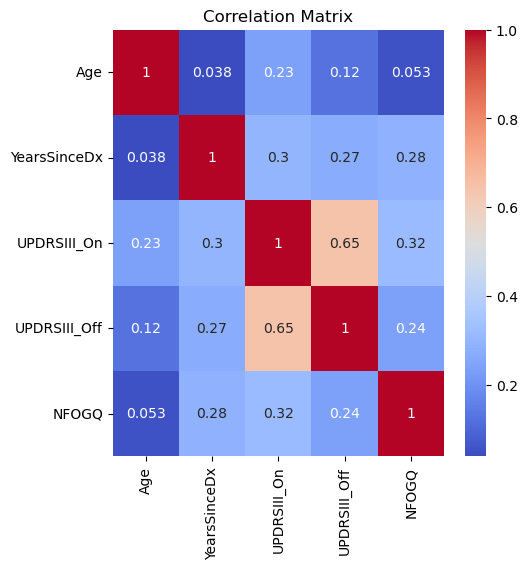

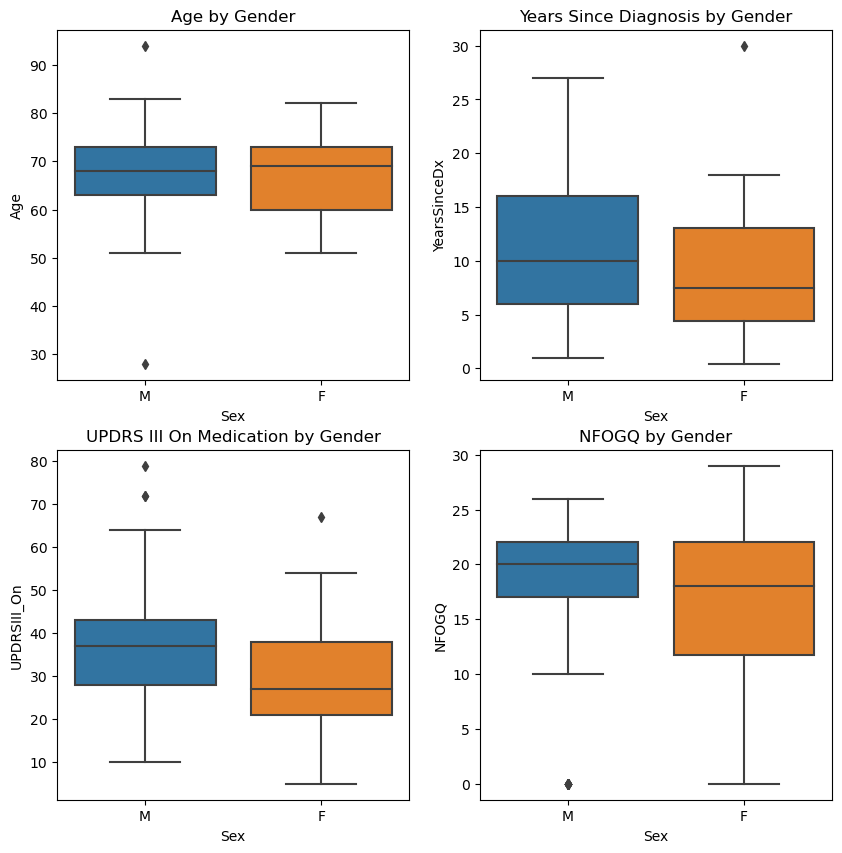

In [ ]:
# Check the shape, data types, and missing values
print(subjects.shape)
print(subjects.dtypes)
print(subjects.isnull().sum())

# Check summary statistics of numerical variables
print(subjects.describe())

# Check distribution of numerical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.histplot(subjects["Age"], kde=True, ax=axs[0,0]).set(title='Age Distribution')
sns.histplot(subjects["YearsSinceDx"], kde=True, ax=axs[0,1]).set(title='Years Since Diagnosis Distribution')
sns.histplot(subjects["UPDRSIII_On"].dropna(), kde=True, ax=axs[0,2]).set(title='UPDRS III On Medication Distribution')
sns.histplot(subjects["UPDRSIII_Off"].dropna(), kde=True, ax=axs[1,0]).set(title='UPDRS III Off Medication Distribution')
sns.histplot(subjects["NFOGQ"], kde=True, ax=axs[1,1]).set(title='NFOGQ Distribution')
plt.delaxes(axs[1, 2])
plt.tight_layout()
plt.show()

# Check distribution of categorical variable
sns.catplot(x="Sex", kind="count", data=subjects).set(title='Gender Distribution')

# Check correlation between numerical variables
corr = subjects[["Age", "YearsSinceDx", "UPDRSIII_On", "UPDRSIII_Off", "NFOGQ"]].corr()
print(corr)

# Visualize correlation matrix using heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm").set(title='Correlation Matrix')

# Create subplots to analyze relationship between numerical and categorical variables
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.boxplot(x="Sex", y="Age", data=subjects, ax=ax[0,0]).set(title='Age by Gender')
sns.boxplot(x="Sex", y="YearsSinceDx", data=subjects, ax=ax[0,1]).set(title='Years Since Diagnosis by Gender')
sns.boxplot(x="Sex", y="UPDRSIII_On", data=subjects, ax=ax[1,0]).set(title='UPDRS III On Medication by Gender')
sns.boxplot(x="Sex", y="NFOGQ", data=subjects, ax=ax[1,1]).set(title='NFOGQ by Gender')
plt.show()

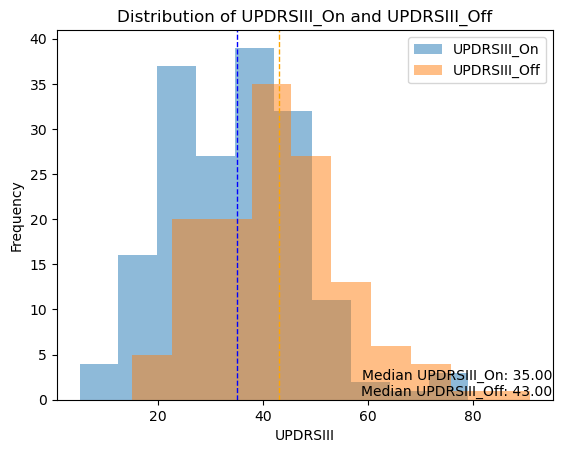

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot histograms for UPDRSIII_On and UPDRSIII_Off
ax.hist(subjects['UPDRSIII_On'], alpha=0.5, label='UPDRSIII_On')
ax.hist(subjects['UPDRSIII_Off'], alpha=0.5, label='UPDRSIII_Off')

# Add median lines
ax.axvline(subjects['UPDRSIII_On'].median(), color='blue', linestyle='dashed', linewidth=1)
ax.axvline(subjects['UPDRSIII_Off'].median(), color='orange', linestyle='dashed', linewidth=1)

# Set axis labels and title
ax.set_xlabel('UPDRSIII')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of UPDRSIII_On and UPDRSIII_Off')

# Add a legend
ax.legend()

# Add a text box with the median values
x_offset = 0.1
y_offset = 0.1
x_pos = ax.get_xlim()[1] - x_offset
y_pos = ax.get_ylim()[0] + y_offset
ax.text(x_pos, y_pos, f'Median UPDRSIII_On: {subjects["UPDRSIII_On"].median():.2f}\nMedian UPDRSIII_Off: {subjects["UPDRSIII_Off"].median():.2f}', verticalalignment='bottom', horizontalalignment='right')

# Show the plot
plt.show()

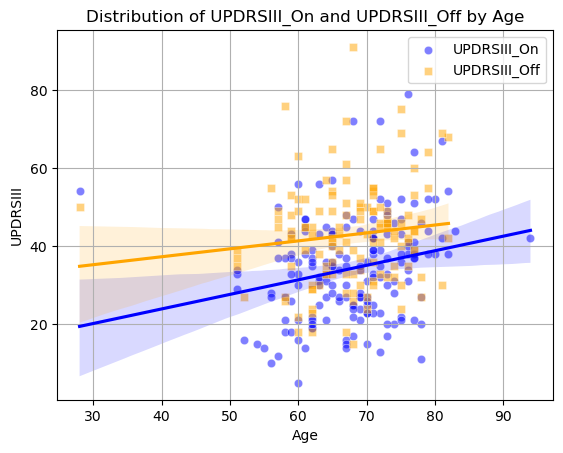

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Scatter plot of UPDRSIII_On and UPDRSIII_Off by Age
sns.scatterplot(x='Age', y='UPDRSIII_On', data=subjects, color='blue', alpha=0.5, label='UPDRSIII_On', marker='o')
sns.scatterplot(x='Age', y='UPDRSIII_Off', data=subjects, color='orange', alpha=0.5, label='UPDRSIII_Off', marker='s')

# Add a regression line
sns.regplot(x='Age', y='UPDRSIII_On', data=subjects, scatter=False, color='blue', label=None)
sns.regplot(x='Age', y='UPDRSIII_Off', data=subjects, scatter=False, color='orange', label=None)

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('UPDRSIII')
ax.set_title('Distribution of UPDRSIII_On and UPDRSIII_Off by Age')

# Add a legend
ax.legend()

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()

In [ ]:
events = pd.read_csv('/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv')
events

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0
...,...,...,...,...,...
3539,f9fc61ce85,620.74000,623.8450,Walking,0.0
3540,f9fc61ce85,774.67800,774.8330,Walking,1.0
3541,f9fc61ce85,924.11900,925.6270,Turn,1.0
3542,f9fc61ce85,983.03900,984.0380,Turn,0.0


(3544, 5)
Id             object
Init          float64
Completion    float64
Type           object
Kinetic       float64
dtype: object
              Init   Completion      Kinetic
count  3544.000000  3544.000000  2502.000000
mean    956.298418   964.489046     0.817746
std     946.357201   943.968560     0.386131
min     -30.669000   -29.719000     0.000000
25%      39.518175    48.610800     1.000000
50%     768.656500   774.261000     1.000000
75%    1570.300000  1576.697250     1.000000
max    4381.217000  4392.745000     1.000000


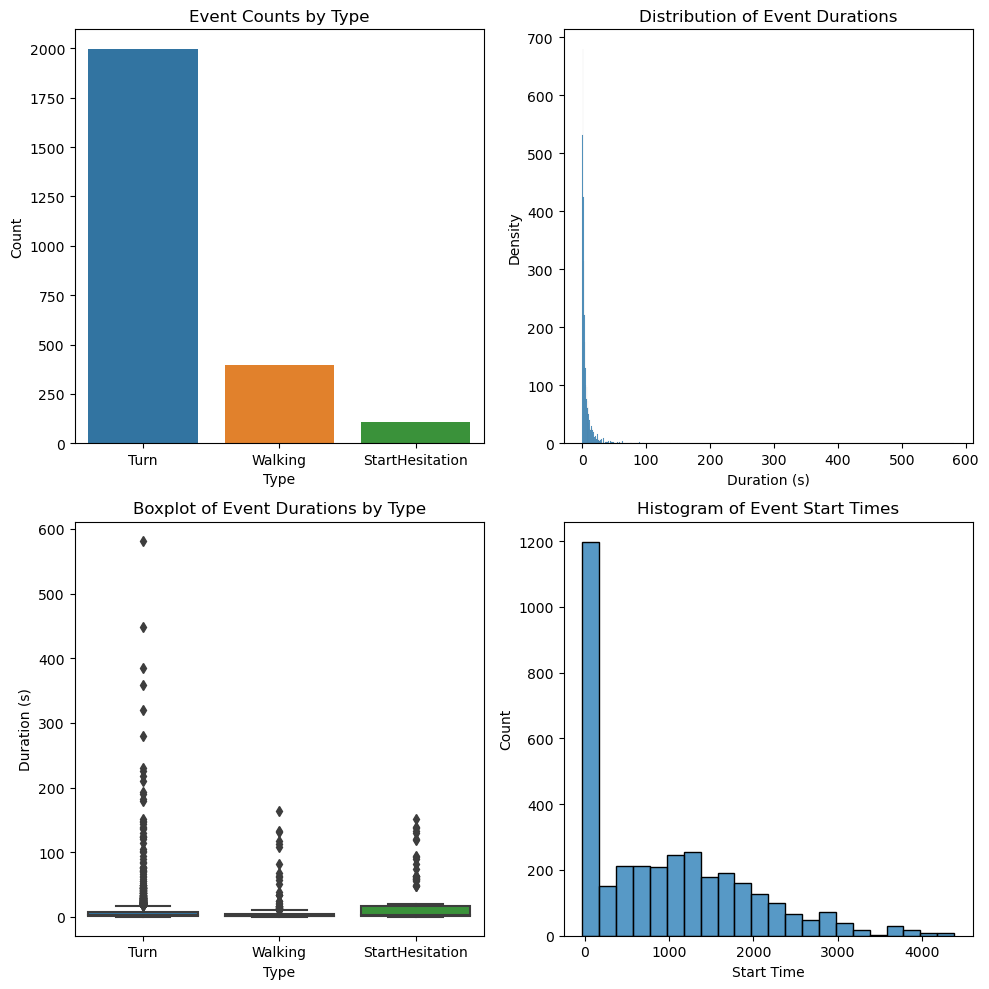

In [ ]:
# Check the data
print(events.shape)
print(events.dtypes)
print(events.describe())

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the count of events by type in the first subplot
sns.countplot(x='Type', data=events, ax=axs[0, 0])
axs[0, 0].set_title('Event Counts by Type')
axs[0, 0].set_xlabel('Type')
axs[0, 0].set_ylabel('Count')

# Plot the distribution of event durations in the second subplot
sns.histplot(events['Completion'] - events['Init'], ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Event Durations')
axs[0, 1].set_xlabel('Duration (s)')
axs[0, 1].set_ylabel('Density')

# Plot the boxplot of event durations by type in the third subplot
sns.boxplot(x='Type', y=events['Completion'] - events['Init'], data=events, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Event Durations by Type')
axs[1, 0].set_xlabel('Type')
axs[1, 0].set_ylabel('Duration (s)')

# Plot the histogram of event start times in the fourth subplot
sns.histplot(x='Init', data=events, ax=axs[1, 1])
axs[1, 1].set_title('Histogram of Event Start Times')
axs[1, 1].set_xlabel('Start Time')
axs[1, 1].set_ylabel('Count')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
tasks = pd.read_csv('/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv')
tasks

,Id,Begin,End,Task
0,02ab235146,10.000,190.480,Rest1
1,02ab235146,211.240,271.560,Rest2
2,02ab235146,505.880,522.400,4MW
3,02ab235146,577.960,594.640,4MW-C
4,02ab235146,701.320,715.280,MB1
...,...,...,...,...
2812,f9fc61ce85,800.586,810.714,TUG-DT
2813,f9fc61ce85,904.416,926.181,Turning-ST
2814,f9fc61ce85,959.211,989.855,Turning-DT
2815,f9fc61ce85,1087.313,1105.086,Hotspot1


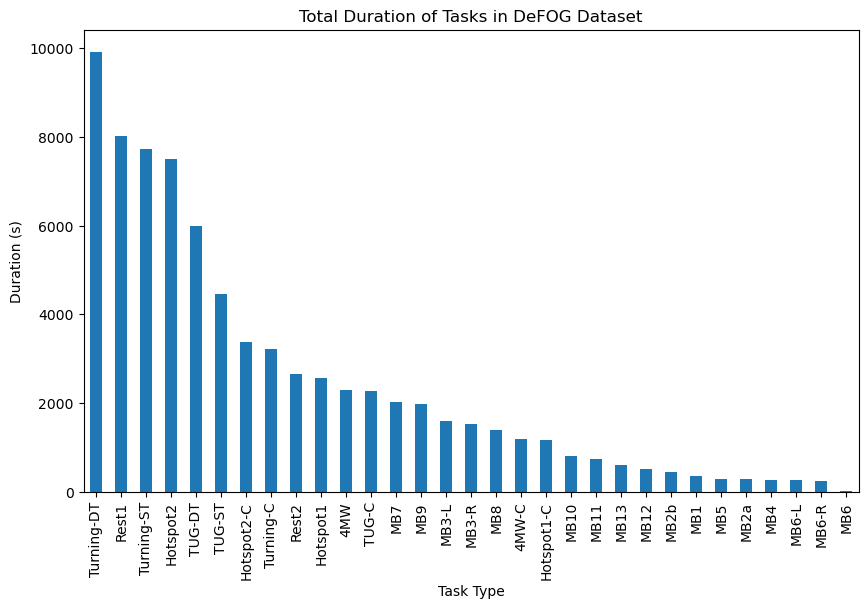

In [ ]:
# Calculate task durations
tasks['Duration (s)'] = tasks['End'] - tasks['Begin']

# Group the tasks by type and calculate the sum of the duration for each group
tasks_duration = tasks.groupby('Task')['Duration (s)'].agg('sum')

# Sort the tasks by duration in descending order
tasks_duration = tasks_duration.sort_values(ascending=False)

# Create a bar plot with task types on the x-axis and task durations on the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
tasks_duration.plot(kind='bar', ax=ax)

# Set the x-axis label
ax.set_xlabel('Task Type')

# Set the y-axis label
ax.set_ylabel('Duration (s)')

# Set the title of the plot
ax.set_title('Total Duration of Tasks in DeFOG Dataset')

# Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



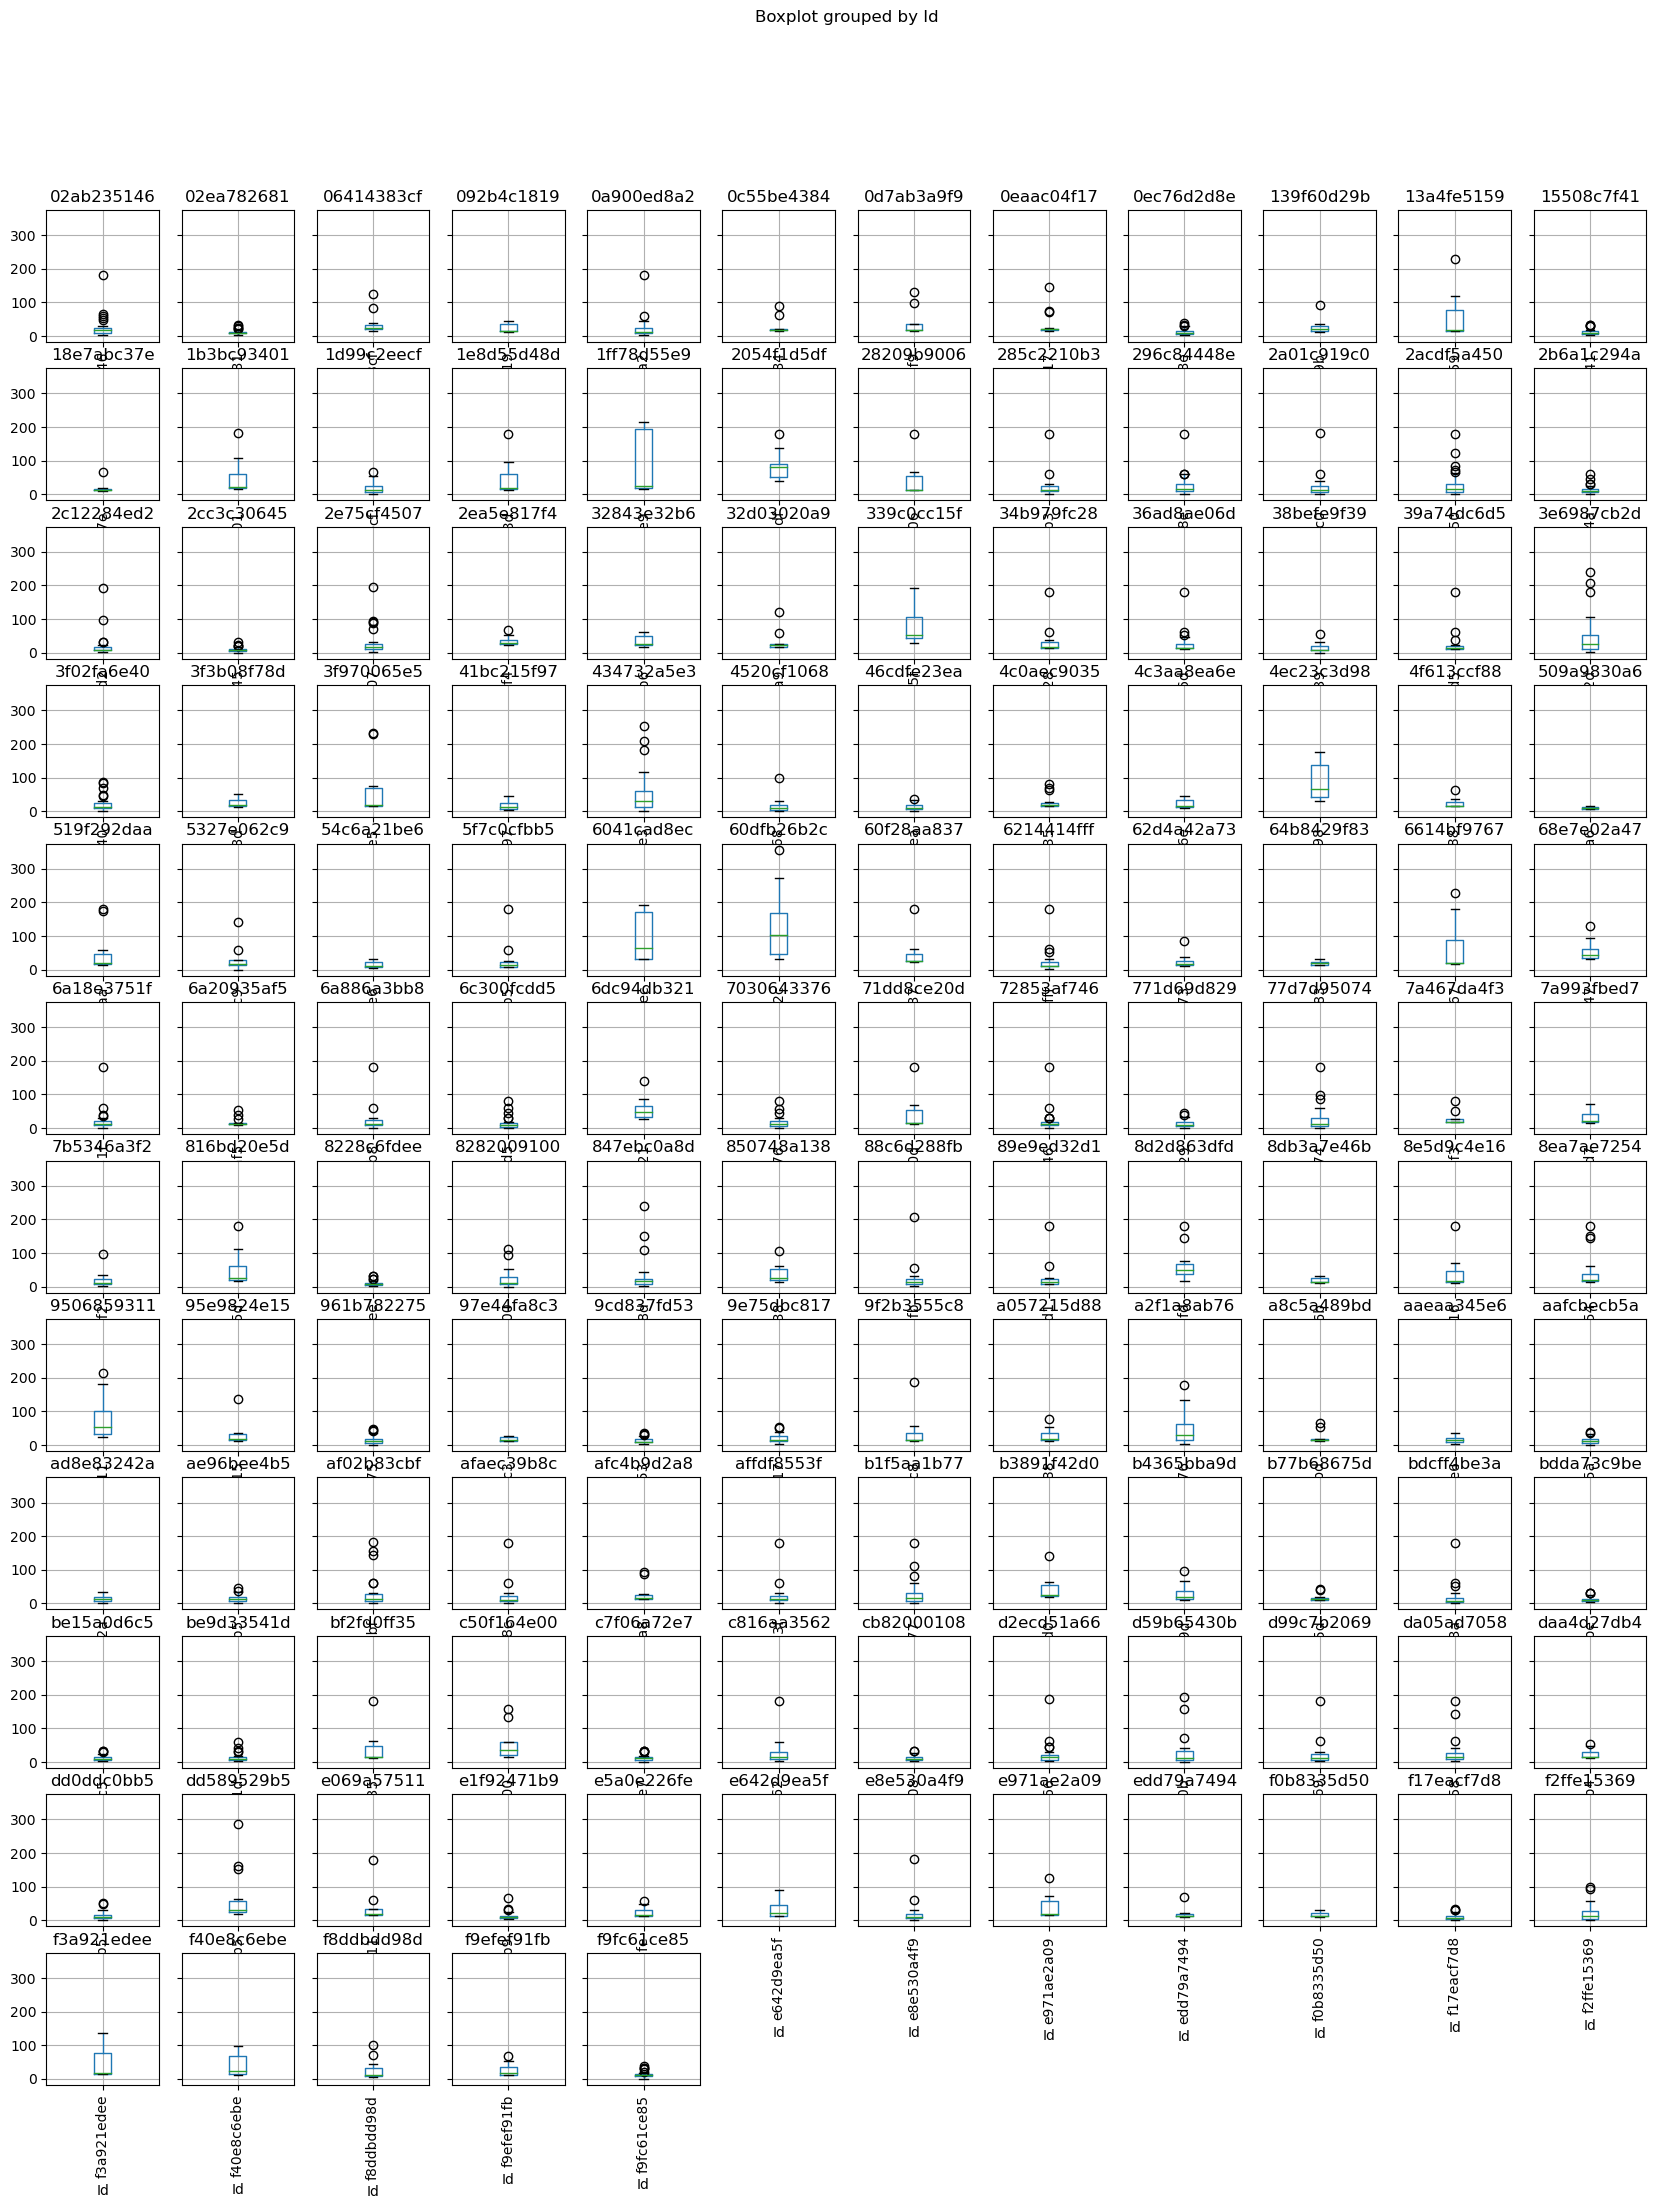

In [ ]:
# Group tasks by series ID
grouped_series = tasks.groupby('Id')

# Create a box plot with series on the x-axis and task durations on the y-axis
fig, ax = plt.subplots(figsize=(20, 25))
grouped_series.boxplot(column='Duration (s)', by='Id', ax=ax, rot=90)

# Set the x-axis label
ax.set_xlabel('Series ID')

# Set the y-axis label
ax.set_ylabel('Duration (s)')

# Set the title of the plot
ax.set_title('Task Durations by Series for DeFOG Dataset')

# Show the plot
plt.show()

In [ ]:
daily_meta = pd.read_csv('/input/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv')
daily_meta

,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,fba3a3,1,10:19
1,07a96f89ec,7da72f,1,07:30
2,0d1bc672a8,056372,2,08:30
3,0e333c9833,b4bd22,1,11:30
4,164adaed7b,9f72eb,1,13:00
...,...,...,...,...
60,e658b0aa3d,0e3d49,1,08:00
61,ed0a487f20,9404ad,1,12:30
62,ef1db3ca64,12f8d1,1,08:00
63,f16c5cda55,2874c5,1,08:30


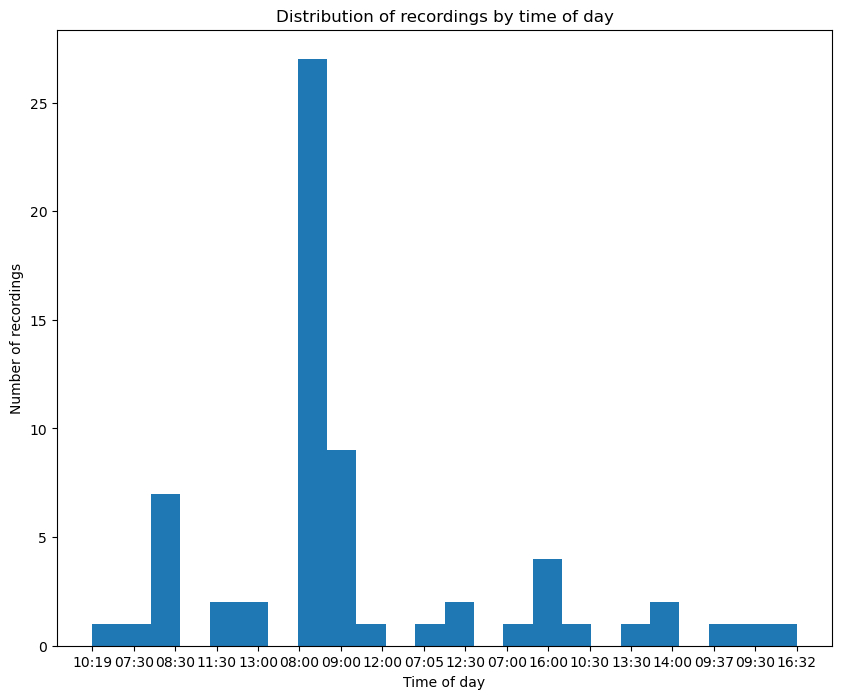

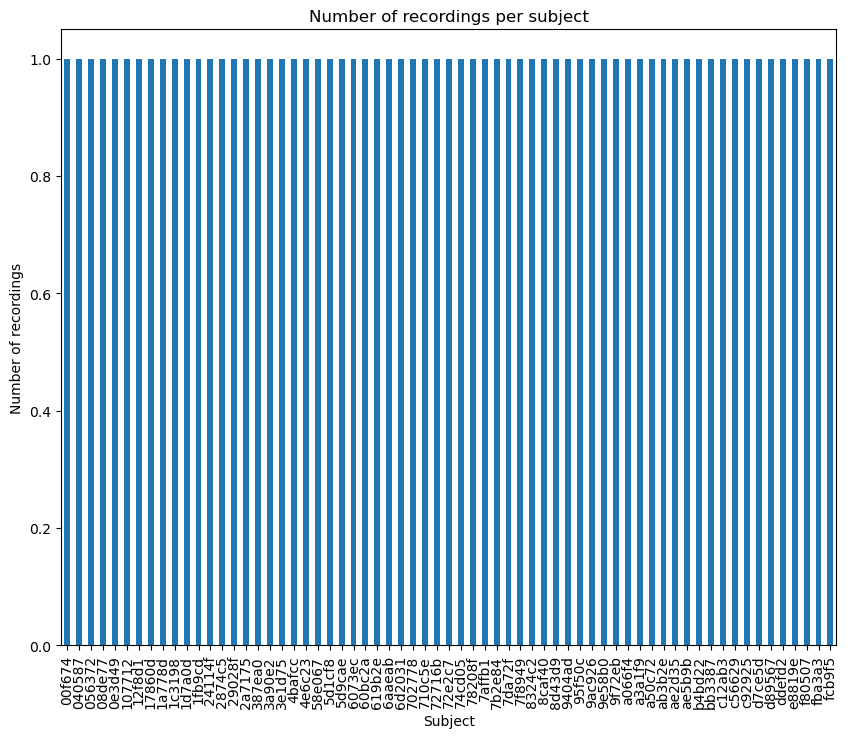

In [ ]:
# plot a histogram of the distribution of recordings by time of day
plt.figure(figsize=(10, 8))
plt.hist(daily_meta['Beginning of recording [00:00-23:59]'], bins=24)
plt.xlabel('Time of day')
plt.ylabel('Number of recordings')
plt.title('Distribution of recordings by time of day')
plt.show()

# plot a bar chart of the number of recordings per subject
plt.figure(figsize=(10, 8))
daily_meta.groupby('Subject')['Id'].count().plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of recordings')
plt.title('Number of recordings per subject')
plt.show()